# M8 - TP2 : Analyse monovariable
Le but du TP est de à décrire une seule variable.



In [1]:
import matplotlib.pyplot as plt
import numpy as np

|ex1|ex2|
|:-:|:-:|
|![](ex1.png) |![](ex2.png)|

## Ex. 1: Correction d'examen
Un professeur souhaite étudier statistiquement les notes sur 10 obtenues par ses élèves à un examen. Les résultats sont donnés dans le tableau ci-dessous.
\begin{array}{c|c}
Nom & Note \\
  \hline
mike &6\\
bob &5\\
evan &9\\
ruppert &3\\
aaron &3\\
steve &1\\
zachariy &9\\
logan &6\\
roger &5\\
don &6\\
bill &5\\
ron &6\\
karl &5\\
stefen &7\\
tom &5\\
neil &10\\
john &2\\
george &1\\
dave &1\\
tim &1
\end{array}

1. Quelles sont les différentes modalités possibles et celles observées ?

In [2]:
x = np.array([6, 5, 9, 3, 3, 1, 9, 6, 5, 6, 5, 6, 5, 7, 5, 10, 2, 1, 1, 1])
Mx = np.unique(x)  # Modalités
Mx

array([ 1,  2,  3,  5,  6,  7,  9, 10])

2. Le code suivant calcule les effectifs cumulés de chaque modalité. Calculez les effectifs cummulés d'une autre manière et vérifier que les résultats sont déjà les mêmes

In [3]:
_,counts = np.unique(x, return_counts=True)
Ni = np.zeros(counts.shape)
Ni[0] = counts[0]
for i in range(0, len(Ni) - 1):
    Ni[i+1] = Ni[i] + counts[i+1]
Ni



array([ 4.,  5.,  7., 12., 16., 17., 19., 20.])

In [4]:
len(x)

20

In [5]:
ni = np.zeros(Mx.shape)

for i in range(len(Mx)):
    ni[i] = np.sum(x==Mx[i])

Ni = np.cumsum(ni)
Ni


array([ 4.,  5.,  7., 12., 16., 17., 19., 20.])

3. Calculez les effectifs par modalité, les fréquences et les fréquences cumulées des notes et affichez-les

In [10]:
ni = counts # Effectifs par modalité 
fi = ni/x.shape  # Fréquences
Fi = Ni/x.shape   # Fréquences cumulées

print('--------------------------------------------------------\n')
print(' modalites n_i N_i f_i F_i \n')
print('--------------------------------------µ------------------\n')

for i in range(len(Mx)):
    print(Mx[i],' - ', ni[i],' - ',  Ni[i],' - ', fi[i],' - ', Fi[i])

--------------------------------------------------------

 modalites n_i N_i f_i F_i 

--------------------------------------µ------------------

1  -  4  -  4.0  -  0.2  -  0.2
2  -  1  -  5.0  -  0.05  -  0.25
3  -  2  -  7.0  -  0.1  -  0.35
5  -  5  -  12.0  -  0.25  -  0.6
6  -  4  -  16.0  -  0.2  -  0.8
7  -  1  -  17.0  -  0.05  -  0.85
9  -  2  -  19.0  -  0.1  -  0.95
10  -  1  -  20.0  -  0.05  -  1.0


4. Tracez la fonction de répartition empirique des notes.

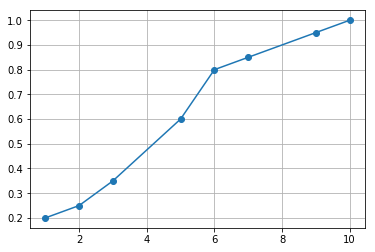

In [12]:
plt.grid(True)
plt.plot(Mx,Fi, 'o-')

5. Déterminez graphiquement la médiane et les quartiles des notes

Médiane : 4.2

Q1 : 2

Q3 : 5.8

6. En déduire le DIQ

DIQ : 5.8 - 2 = 3.8

7. Dessinez la boite à moustache associée sur une feuille.

    a) Est-ce la même que la figure 1 ?

    b) Selon vos calculs, y a-t-il une variable aberrante parmi ces notes ?

{'boxes': [<matplotlib.lines.Line2D at 0x7fab6e0fcc88>],
 'caps': [<matplotlib.lines.Line2D at 0x7fab6e1076d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab6e10f390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fab6e107f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fab6e0fcdd8>,
  <matplotlib.lines.Line2D at 0x7fab6e1072b0>]}

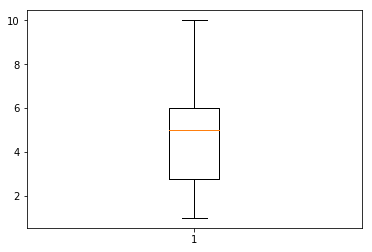

In [15]:
plt.boxplot(x)


a) La médiane et le premier quartile parait plus élévé sur la boite à moustache. Le Q3 semble de meme valeur.

b) Non pour nous il n'y a pas de valeurs aberrantes, car toutes nos valeurs sont dans l'épure.

8. On souhaite connaitre la valeur centrale de l’ensemble de nos observations $x_i$, $i = 1, n$.
On modélise ce problème à travers une fonction coût $J$ :

    $J(c) = -\sum^{i=1}_{n}c(\log\frac{x_i}{c} + 1)$
    
    a) Donnez l’expression de c en fonction des $xi, i = 1, n$ qui minimise le coût $J$.
    
    b) Application numérique : calculez c pour les données observées.

a) $c = exp[ (1/n)*\sum^{i=1}_{n}log(x_i) ]  $
   

In [ ]:
c = np.exp((1/n)*(np.sum(np.log(x[i]))))


In [35]:
n = len(x)
c = np.exp(np.mean(np.log(x))) 
c

3.8090399649559123

## Ex. 2: Le petit-déjeuner

1. Récupérez le fichier cereal.mat sur moodle. Ce fichier contient les mesures des ingrédients de céréales pour petit déjeuner. Sur chaque type de céréale, 8 variables ont été mesurées. Ces variables sont (dans l’ordre) :

    - Calories: la teneur en calories (le nombre pour un repas)
    - Carbo: la teneur en carbohydrates (en gramme pour un repas)
    - Cups: le nombre de tasse recommandé par repas
    - Fat: la teneur en graisse (en gramme pour un repas)
    - Fiber: la teneur en fibres alimentaires (en gramme pour un repas)
    - Potass: la teneur en potassium (en mg pour un repas)
    - Protein: la teneur en proteine (en gramme pour un repas)
    - Sugars: la teneur en sucre (en gramme pour un repas)
    
    Ce fichier se décompose (entre autres) en la matrice X qui contient toutes les données, et le tableau Name qui contient les noms des marques.
    
    Chargez le fichier, puis extrayez la matrice X et le tableau Name. Calculer le nombre de marques de céréales présentes dans la base de données.
    

In [44]:
import scipy.io as sio
mat = sio.loadmat("cereal.mat")
X = mat["X"]
Name = mat["Name"]


2. Nous allons commencer par nous intéresser à la deuxième variable (Carbo) uniquement.

In [42]:
x = X[:,1]
x

array([ 5. ,  8. ,  7. ,  8. , 14. , 10.5, 11. , 18. , 15. , 13. , 12. ,
       17. , 13. , 13. , 12. , 22. , 21. , 13. , 12. , 10. , 21. , 21. ,
       11. , 18. , 11. , 14. , 14. , 12. , 14. , 13. , 11. , 15. , 15. ,
       17. , 13. , 12. , 11.5, 14. , 17. , 20. , 21. , 12. , 12. , 16. ,
       16. , 16. , 17. , 15. , 15. , 21. , 18. , 13.5, 11. , 20. , 13. ,
       10. , 14. , -1. , 14. , 10.5, 15. , 23. , 22. , 16. , 19. , 20. ,
        9. , 16. , 15. , 21. , 15. , 16. , 21. , 13. , 17. , 17. , 16. ])

3. Dessinez la boite à moustache associée

{'boxes': [<matplotlib.lines.Line2D at 0x7fab5b79ff28>],
 'caps': [<matplotlib.lines.Line2D at 0x7fab5b729978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab5b730630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fab5b730208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fab5b7290b8>,
  <matplotlib.lines.Line2D at 0x7fab5b729550>]}

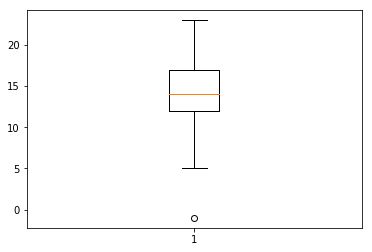

In [45]:
plt.boxplot(x)

4. calculez la moyenne de la variable (Carbo)

In [48]:
moy = np.mean(x)
moy

14.597402597402597

## Ex. 3: Assimilation

1. Soit m une moyenne connue et $\lambda$ un facteur de confiance connu lui aussi. On souhaite connaitre la valeur centrale d’un ensemble de points $x_i, i = 1, n$, sachant que cette valeur doit être proche de $m$ avec une confiance $\lambda$. On modélise ce problème à travers une fonction coût $J$ :

    $J(c) = \sum^n_{i=1}(x_i - c)^2 + \lambda(c-m)^2$

    a) Donnez l’expression de $c$ qui minimise le coût $J$.

    b) Application numérique : calculez $c$ pour $m = 153$, $\lambda = 20$, $n = 10$ et $x1, . . . , x10 = 140, 145, 151, 155, 140, 125, 132, 129, 163, 133$

a $J'(c) = -2*\sum^n_{i=1}(x_i - c)+ 2*\lambda(c-m)$

$c=\frac{\sum^n_{i=1}(x_i) +\lambda*m}{n + \lambda}$



In [12]:
x = [140,145,151,155,140,125,132,129,163,133]
lmbda = 20
m = 153
n = len(x)
c = (np.sum(x)+lmbda*m)/(n + lmbda)
print('b)')
c

b)


149.1